# week3-sessionn1 アヤメの分析

# 3.データセットの準備

scikit-learnという機械学習ライブラリにはirisデータセットが用意されているため、これを使用します。

## 【問題1】データの取得  
以下のドキュメントを参考にしながら、irisデータセット読み込みましょう。

sklearn.datasets.load_iris — scikit-learn 0.20.2 documentation  
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html

データが読み込めたら、説明変数を下のようなPandasのDataFrame型変数Xに格納してください。列の名前も以下を参考にしてください。

pandas.DataFrame — pandas 0.24.2 documentation  
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html

### 1.1.1（解答）iris_dataの読み込みと、各データの確認

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris # ライブラリのインポート

iris_dataset = load_iris() # インポートしたデータセットをiris_datasetに格納する

print("Keys of iris_dataset: \n{}" .format(iris_dataset.keys())) #入っているデータを確認する。
print("First five columns of data:\n {}" .format(iris_dataset['data'][:5])) #dataの中身を先頭５つ表示させる。 
print("Shape of data: {}" .format(iris_dataset['data'].shape)) # dataの配列を確認する。

print(iris_dataset['DESCR'][:193] + "\n...") #DESCRITIONの中身を確認する。(データの説明が記載）

print("Feature names: {}" .format(iris_dataset['feature_names']))# 得微量の名前


print("First five columns of target: {}" .format(iris_dataset['target'][:5])) # ターゲットはラベル

print("Filename: {}" .format(iris_dataset['filename'])) #filenameはファイル名

print("Target names: {}" .format(iris_dataset['target_names'])) # ターゲットの３つの花の名前

Keys of iris_dataset: 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])
First five columns of data:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
Shape of data: (150, 4)
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, pre
...
Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
First five columns of target: [0 0 0 0 0]
Filename: /opt/anaconda3/lib/python3.8/site-packages/sklearn/datasets/data/iris.csv
Target names: ['setosa' 'versicolor' 'virginica']


### 1.2.1（解答）pandasのDataFrame型Xに格納

In [2]:
X = pd.DataFrame(iris_dataset["data"])
X.columns = ["sepal_length", "sepal_width", "petal_length", "petal_width"] 
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### 1.3.1（解答）pandasのDataFrame型Yに格納

In [3]:
y = pd.DataFrame(iris_dataset["target"])
y.columns = ["species"]
y.tail()

,species
145,2
146,2
147,2
148,2
149,2


## 【問題2】データの結合  
問題1で準備したX,yを結合させたDataFrame型変数dfを作成してください。結合することで扱いやすくなります。これ以降はこのdfを使っていきます。

Merge, join, and concatenate — pandas 0.24.2 documentation  
https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html

pandas.concat — pandas 0.24.2 documentation  
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html

### 2.1.1（解答）

In [4]:
df0 = pd.concat([X, y], axis=1)
df0

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


### 2.2.1（予備知識）ターゲットデータの要素を数字から名称に変更

In [5]:
df1 = df0.replace({'species': {0 : "setosa"}})
df2 = df1.replace({'species': {1 : "versicolor"}})
df = df2.replace({'species': {2 : 'virginica'}})
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


# 4.データの概観

## 【問題3】データの確認  
今回扱うデータがどのようなものなのかを確認します。以下の4つを行ってください。  
- 先頭から4番目までのサンプルを表示させ、各特徴量がどういったものかを見る。（数値データか文字データかなど）
- ラベルごとのサンプル数の合計を出力する。
- 特徴量に欠損値があるかを確認する。
- 特徴量の平均値と標準偏差、四分位数を一度に表示させる。

DataFrameのメソッドである.head(),.info(),.describe(),.isnull(),.sum()や、Seriesのメソッドである.value_countsなどを使ってみましょう。


pandas.DataFrame.head — pandas 0.25.3 documentation  
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html

pandas.DataFrame.info — pandas 0.25.3 documentation  
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html

pandas.DataFrame.describe — pandas 0.25.3 documentation  
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html

pandas.DataFrame.isnull — pandas 0.25.3 documentation  
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isnull.html

pandas.DataFrame.sum — pandas 0.25.3 documentation  
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sum.html

pandas.Series.value_counts — pandas 0.25.3 documentation  
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html

### 3.1.1（解答）先頭から4番目までのサンプルを表示させ、各特徴量がどういったものかを見る。

In [6]:
df.head(4)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### 3.2.1（解答）ラベルごとのサンプル数の合計を出力する。

In [8]:
df0.sum()

sepal_length    876.5
sepal_width     458.6
petal_length    563.7
petal_width     179.9
species         150.0
dtype: float64

### 3.3.1（解答）特徴量に欠損値があるかを確認する。

In [9]:
df.isnull()

,sepal_length,sepal_width,petal_length,petal_width,species
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


### 3.4.1（解答）特徴量の平均値と標準偏差、四分位数を一度に表示させる。

In [10]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# 【問題4】irisデータセット自体の調査  
ページのはじめで「カナダのガスペ半島のある牧草地で」と書きましたが、データセット自体についてもう少し調査しておきましょう。データセットを見る上で、そのデータセット自体について知っておくことも大切です。

### 4.1.1（解答）

機械学習用ライブラリ scikit-learn には練習用データセットがいくつか用意されています。その中の 1 つ、Iris flower data set には、Iris (アヤメ属) に属する 3 品種、setosa (セトサ)、versicolor (バージカラー)、versinica (バージニカ) の特徴量測定値とクラスデータ（品種データ）が収められています。

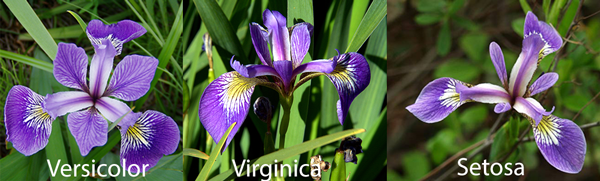

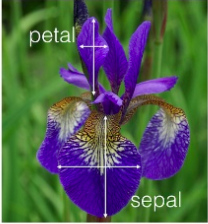

Irisには4つの測定値がそれぞれ150個あります。  

- Sepal Length(cm) がく片の長さ
- Sepal Width がく片の幅
- Petal length 花びらの長さ
- petal Width 花びらの幅
- ※Petal（花びら）
- ※Sepal（がくの長さ）
 
正解値(ラベル: ラベルの名称)は、下記になります。
- 0: setosa
- 1: versicolor
- 2: virginica

# 5.特徴量についての探索

## 【問題5】必要なデータを抽出  
DataFrameから必要なデータを抽出する方法を確認していきます。以下を行ってください。

- sepal_widthの列を３つの異なる方法で抽出する
- 50番目から99番目までのデータを抽出する
- petal_lengthの列の50番目から99番目までのデータを抽出する
- petal_widthの値が0.2のデータを抽出する

.locや.ilocを使うことになります。この２つはどう違うのかについて説明してください。

### 5.1.1（解答）sepal_widthの列を３つの異なる方法で抽出する

In [11]:
### 5.1.1（参考）
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [12]:
### 5.1.2（解答）
df["sepal_width"]

0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: sepal_width, Length: 150, dtype: float64

In [13]:
### 5.1.3（解答）
df.loc[:, "sepal_width"]

0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: sepal_width, Length: 150, dtype: float64

In [14]:
### 5.1.4（解答）
df.iloc[:, 1]

0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: sepal_width, Length: 150, dtype: float64

### 5.2.1（解答）50番目から99番目までのデータを抽出する

In [15]:
df.iloc[50:100, :]

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
53,5.5,2.3,4.0,1.3,versicolor
54,6.5,2.8,4.6,1.5,versicolor
55,5.7,2.8,4.5,1.3,versicolor
56,6.3,3.3,4.7,1.6,versicolor
57,4.9,2.4,3.3,1.0,versicolor
58,6.6,2.9,4.6,1.3,versicolor
59,5.2,2.7,3.9,1.4,versicolor


### 5.3.1（解答）petal_lengthの列の50番目から99番目までのデータを抽出する

In [16]:
df.loc[50:99, "petal_length"]

50    4.7
51    4.5
52    4.9
53    4.0
54    4.6
55    4.5
56    4.7
57    3.3
58    4.6
59    3.9
60    3.5
61    4.2
62    4.0
63    4.7
64    3.6
65    4.4
66    4.5
67    4.1
68    4.5
69    3.9
70    4.8
71    4.0
72    4.9
73    4.7
74    4.3
75    4.4
76    4.8
77    5.0
78    4.5
79    3.5
80    3.8
81    3.7
82    3.9
83    5.1
84    4.5
85    4.5
86    4.7
87    4.4
88    4.1
89    4.0
90    4.4
91    4.6
92    4.0
93    3.3
94    4.2
95    4.2
96    4.2
97    4.3
98    3.0
99    4.1
Name: petal_length, dtype: float64

### 5.4.1（解答）petal_widthの値が0.2のデータを抽出する

In [17]:
df.query('petal_width == 0.2')
# df[df["petal_width"].isin([0.2])]

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
10,5.4,3.7,1.5,0.2,setosa
11,4.8,3.4,1.6,0.2,setosa
14,5.8,4.0,1.2,0.2,setosa


### 5.5.1（解答）.locや.iloc、２つはどう違うのか？

- iloc : 行列を番号で指定する
- loc  : 行列をindex名、columns名で指定する

## 【問題6】図の作成  
データは可視化して確認することが大切です。次の3つを行ってください。作図のライブラリはMatplotlibの他seabornもよく使われます。

- ラベルごとのサンプル数を円グラフにする（パーセンテージまで表示する）
- 特徴量を一つずつ選び、箱ひげ図を使ってラベルごとのデータの分布を可視化する
- 特徴量を一つずつ選び、バイオリン図を使ってラベルごとのデータの分布を可視化する

箱ひげ図とバイオリン図は似た図を表示します。これらはどう違い、それぞれどのような利点があるのかについて説明してください。

### 6.1.1（解答）ラベルごとのサンプル数を円グラフにする（パーセンテージまで表示する）

Text(0.5, 1.0, 'species rate')

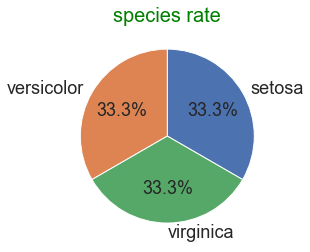

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

fig, ax = plt.subplots()
ax.pie(df["species"].value_counts(), labels = iris_dataset["target_names"], startangle = -30, autopct="%1.1f%%", textprops={"fontsize": 18})
ax.set_title("species rate",fontsize=20, color="green")

### 6.1.2（解答）6.1.1の別コード（こちらのほうが先に作成したコード）

Text(0.5, 1.0, 'species rate')

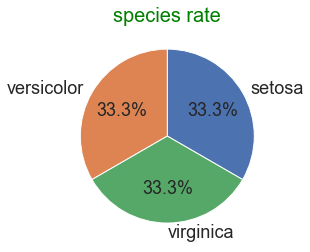

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

label = ['setosa', 'versicolor', 'virginica']

setosa_data = df.query('species == "setosa"')
versicolor_data = df.query('species == "versicolor"')
virginica_data = df.query('species == "virginica"')

label_data = [len(setosa_data), len(versicolor_data), len(virginica_data)]

fig, ax = plt.subplots()
ax.pie(label_data, labels = label, startangle = -30, autopct="%1.1f%%", textprops={"fontsize": 18})
ax.set_title("species rate",fontsize=20, color="green")

### 6.2.1（解答）特徴量を一つずつ選び、箱ひげ図を使ってラベルごとのデータの分布を可視化する

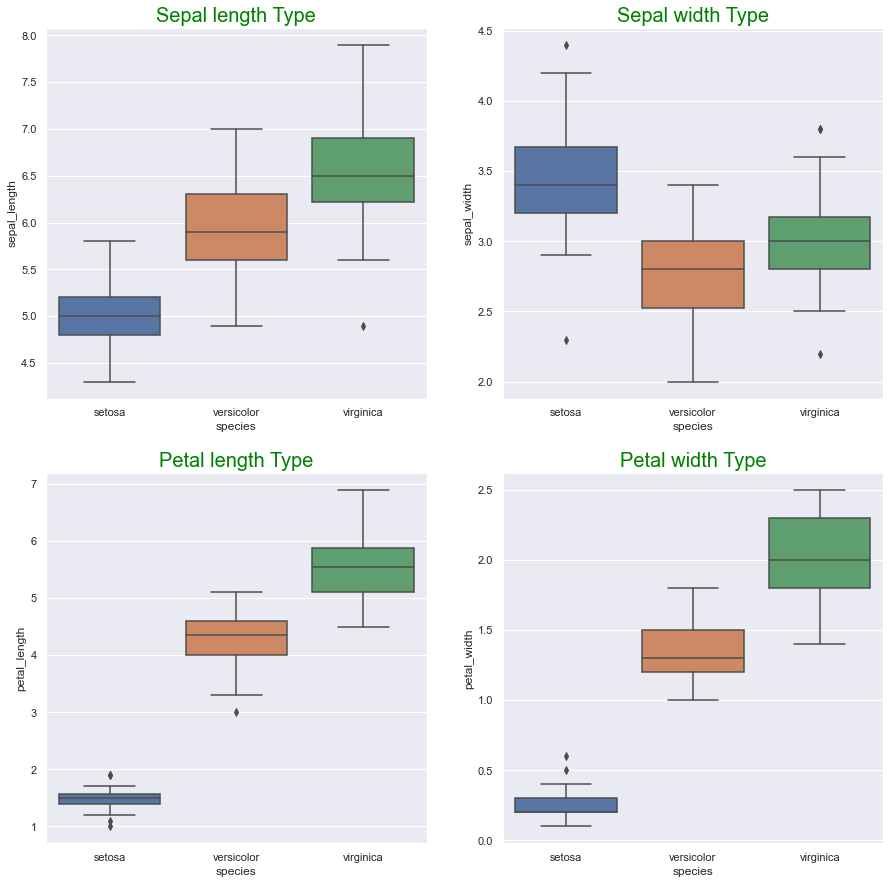

In [20]:
# seaborn使用
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

fig, ax = plt.subplots(2,2,figsize=(15,15))
ax1 = sns.boxplot(x='species', y='sepal_length', data=df, ax=ax[0,0])
ax1 = ax1.set_title("Sepal length Type",fontsize=20, color="green")
ax2 = sns.boxplot(x='species', y='sepal_width', data=df, ax=ax[0,1])
ax2 = ax2.set_title("Sepal width Type",fontsize=20, color="green")
ax3 = sns.boxplot(x='species', y='petal_length', data=df, ax=ax[1,0])
ax3 = ax3.set_title("Petal length Type",fontsize=20, color="green")
ax4 = sns.boxplot(x='species', y='petal_width', data=df, ax=ax[1,1])
ax4 = ax4.set_title("Petal width Type",fontsize=20, color="green")

### 6.2.2（検討）matplotlibのみでの描写

### 6.3.1（解答）特徴量を一つずつ選び、バイオリン図を使ってラベルごとのデータの分布を可視化する

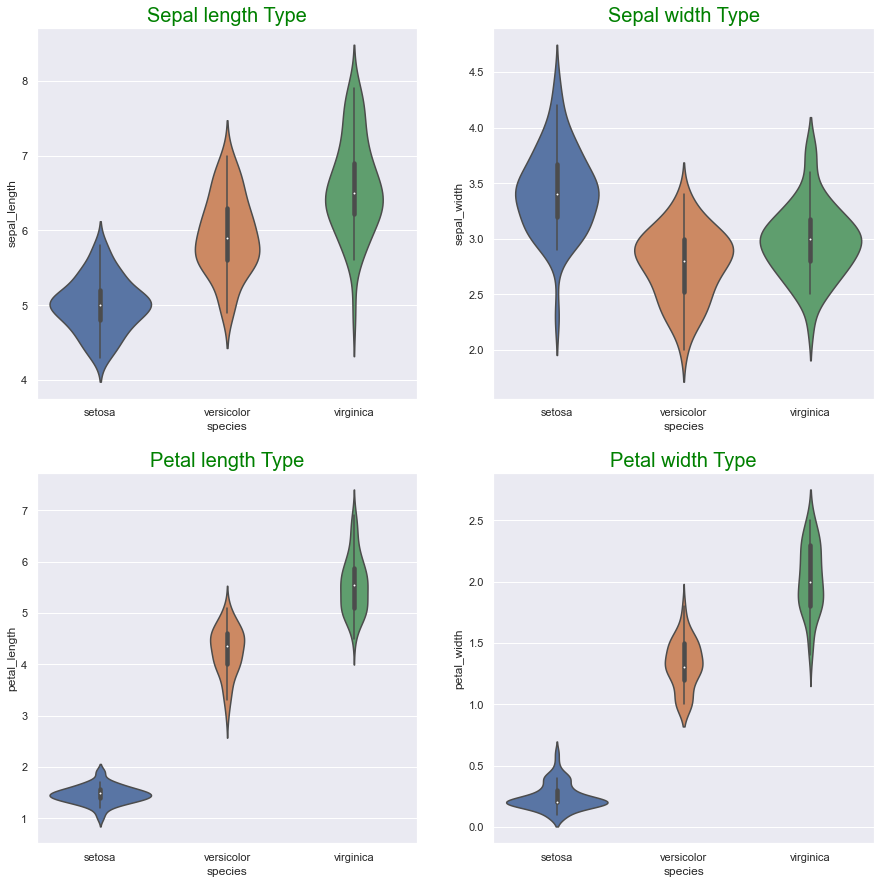

In [21]:
fig, ax = plt.subplots(2,2,figsize=(15,15))

ax1 = sns.violinplot(x='species', y='sepal_length', data=df, ax=ax[0,0])
ax1 = ax1.set_title("Sepal length Type",fontsize=20, color="green")
ax2 = sns.violinplot(x='species', y='sepal_width', data=df, ax=ax[0,1])
ax2 = ax2.set_title("Sepal width Type",fontsize=20, color="green")
ax3 = sns.violinplot(x='species', y='petal_length', data=df, ax=ax[1,0])
ax3 = ax3.set_title("Petal length Type",fontsize=20, color="green")
ax4 = sns.violinplot(x='species', y='petal_width', data=df, ax=ax[1,1])
ax4 = ax4.set_title("Petal width Type",fontsize=20, color="green")

### 6.4.1（解答）箱ひげ図とバイオリン図の違い

箱ひげ図との比較 バイオリン図には箱ひげ図よりも多くの情報が含まれる。  
箱ひげ図には平均/中央値と四分位範囲という要約統計量のみが含まれるのに対し、バイオリンプロットにはす各データの分布がそのまま図に現れているため、より正確な比較ができます。強いて言えば、カーネル密度推定により一様分布の両端が実際よりも滑らかに描画されているため、カーネル密度推定が苦手とする形の分布を扱う場合は気をつけたほうが良いでしょう。

**バイオリン図の欠点**  
- データ分布はカーネル密度推定プロットによって滑らかに描画されるため、実際にはデータが存在しない範囲にもあたかもデータが存在しているかのように見えることがある。
- ひとつのバイオリン図内にある各カーネル密度推定プロットの面積は同一ではない。値が取りうる範囲が大きかったりデータが一様に分布していると、描画されるカーネル密度推定プロットの面積が大きくなるため錯覚が起こる可能性がある。
- 知名度が低い（Wikipedia談）。しかし割と直感的に分かりやすい図法ではあると思われるので、知名度が低くても人から理解されにくいということはなさそう？



# 【問題7】特徴量間の関係の確認  
特徴量間の関係を見ていきます。次の4つを行ってください。

- 縦軸と横軸に特徴量を１つずつ取り、種類毎に色分けした散布図を作る(６つ)
- 全ての組み合わせの散布図を一度に表示させる、散布図行列を作る(１つ)
- ４つの特徴量に関する相関係数行列を作る
- 相関係数行列のヒートマップを作る(１つ)

相関係数行列はDataFrameのcorr()メソッドを使うことで求められます。

pandas.DataFrame.corr — pandas 0.24.2 documentation  
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html

### 7.1.1（解答）縦軸と横軸に特徴量を１つずつ取り、種類毎に色分けした散布図を作る(６つ)

Text(0.5, 1.0, 'virginica_petal_data')

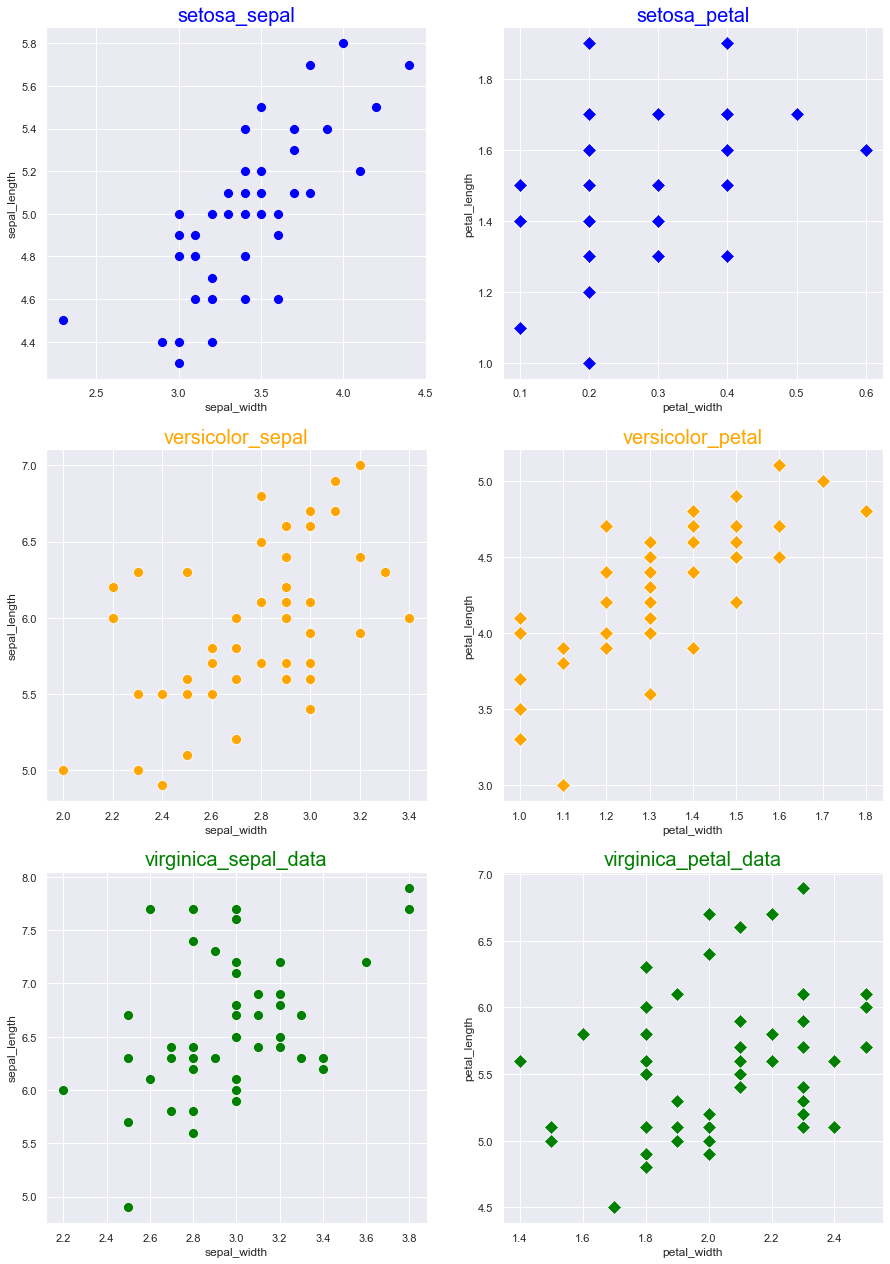

In [22]:
fig, axes = plt.subplots(3,2,figsize=(15,22))
axes1 = sns.scatterplot('sepal_width', 'sepal_length', data=setosa_data, color="blue", s=100, ax=axes[0,0])
axes1.set_title("setosa_sepal", fontsize=20, color="blue")

axes2 = sns.scatterplot('petal_width', 'petal_length', data=setosa_data, color="blue", marker="D", s=100, ax=axes[0,1])
axes2.set_title("setosa_petal", fontsize=20, color="blue")


axes3 = sns.scatterplot('sepal_width', 'sepal_length', data=versicolor_data, color="orange", s=100, ax=axes[1,0])
axes3.set_title("versicolor_sepal", fontsize=20, color="orange")

axes4 = sns.scatterplot('petal_width', 'petal_length', data=versicolor_data, color="orange", marker="D", s=100, ax=axes[1,1])
axes4.set_title("versicolor_petal", fontsize=20, color="orange")


axes5 = sns.scatterplot('sepal_width', 'sepal_length', data=virginica_data, color="green", s=100, ax=axes[2,0])
axes5.set_title("virginica_sepal_data", fontsize=20, color="green")

axes6 = sns.scatterplot('petal_width', 'petal_length', data=virginica_data, color="green", marker="D", s=100, ax=axes[2,1])
axes6.set_title("virginica_petal_data", fontsize=20, color="green")

### 7.2.1（解答）全ての組み合わせの散布図を一度に表示させる、散布図行列を作る(１つ)

Text(0.5, 1.0, 'Iris data')

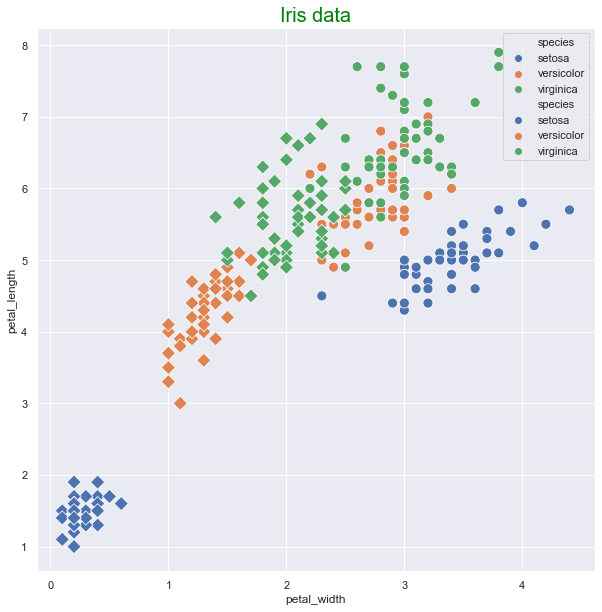

In [23]:
fig, ax = plt.subplots(1,1,figsize=(10,10))

color_list = ["green", "blue", "red"]
ax1 = sns.scatterplot('sepal_width', 'sepal_length', data=df, hue="species", marker="o", s=100)
ax2 = sns.scatterplot('petal_width', 'petal_length', data=df, hue="species", marker="D", s=100)
ax.set_title("Iris data", fontsize=20, color="green")

### 7.3.0（解説）相関係数行列とは  
相関係数とは，２つの変量間の関係の深さを表す指標である。  
回帰分析が予測や推定に用いられるのに対し、相関係数は、関係を観察するために用いられる。

**相関係数の性質**
- 最大 １，最小 −１ の値をとる．
- 相関係数の絶対値が １ に近い程，相関は強いことが分かる
- 相関係数の絶対値が １ になるのは，データ点が一直線上に位置するときのみである．
- 相関係数は，直線的な関係の強さをはかるもので，曲線的な関係を調べるのには向いていない．

参考資料
http://www.ec.kansai-u.ac.jp/user/amatsuo/pdf/corel.pdf

### 7.3.1（解答）４つの特徴量に関する相関係数行列を作る

In [24]:
iris_corr = df.corr()
print(iris_corr)
print(type(iris_corr))

              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.117570      0.871754     0.817941
sepal_width      -0.117570     1.000000     -0.428440    -0.366126
petal_length      0.871754    -0.428440      1.000000     0.962865
petal_width       0.817941    -0.366126      0.962865     1.000000
<class 'pandas.core.frame.DataFrame'>


### 7.4.1（解答）相関係数行列のヒートマップを作る(１つ)

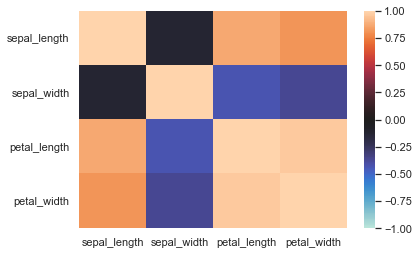

In [25]:
sns.heatmap(iris_corr, vmax=1, vmin=-1, center=0)

# 【問題8】可視化したグラフや表の結果の説明  
データを探索した時には、結果を述べる（+考察する）ことが大切です。ここまでで作成した表や図から読み取れることや気づきを説明してください。  

例えば、散布図行列を見ながら、3種類のアヤメにはどのような違いがあるかを説明してください。

### 8.1.1（解答）箱ひげ図とバイオリン図の違い

花びらに比べてがくの方が大きく、花びら、がく共に幅より長さの方が長い事が３種類に共通している。品種ごとには、setosa種はがくと花びらの大きさが大きく異なり、virginica種はほとんどサイズの差が小さい。